In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import math

In [2]:
dane = pd.read_csv("dane/insurance.csv")

In [3]:
dane

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# zmodyfikowany materiał z zajęć
def drawAllHist(data, histNumInRow, res):
    """
    Funkcja rysująca histogramy z podanych danych w postaci siatki wykresów
    :param data: dane w postaci np.array wczytane z sklearn
    :param histNumInRow: wartość całkowita określająca ilość histogramów w jednym rzędzie
    :param res: rozdzielczość histogramów
    """
    # ile mamy kolumn w danych
    cols = data.values.shape[1]
    # liczymy ile ma być rzędów
    howManyHistRows = math.ceil(cols/histNumInRow)
    # tworzymy kontener na wykresy
    fig, axs = plt.subplots(howManyHistRows, histNumInRow, figsize=(20, 20))
    # rysujemy, idziemy po rzędach i rysujemy w każdej kolumnie
    for r in range(histNumInRow):
        for c in range(howManyHistRows):
            # liczymy indeks kolumny w danych
            idx = int(c * histNumInRow + r)
            # sprawdzamy czy tyle w ogóle ich mamy
            if idx < cols:
                axs[c, r].set_title(data.columns[idx])
                axs[c, r].hist(data[data.columns[idx]], bins=res)
            else:
                break
    plt.show()

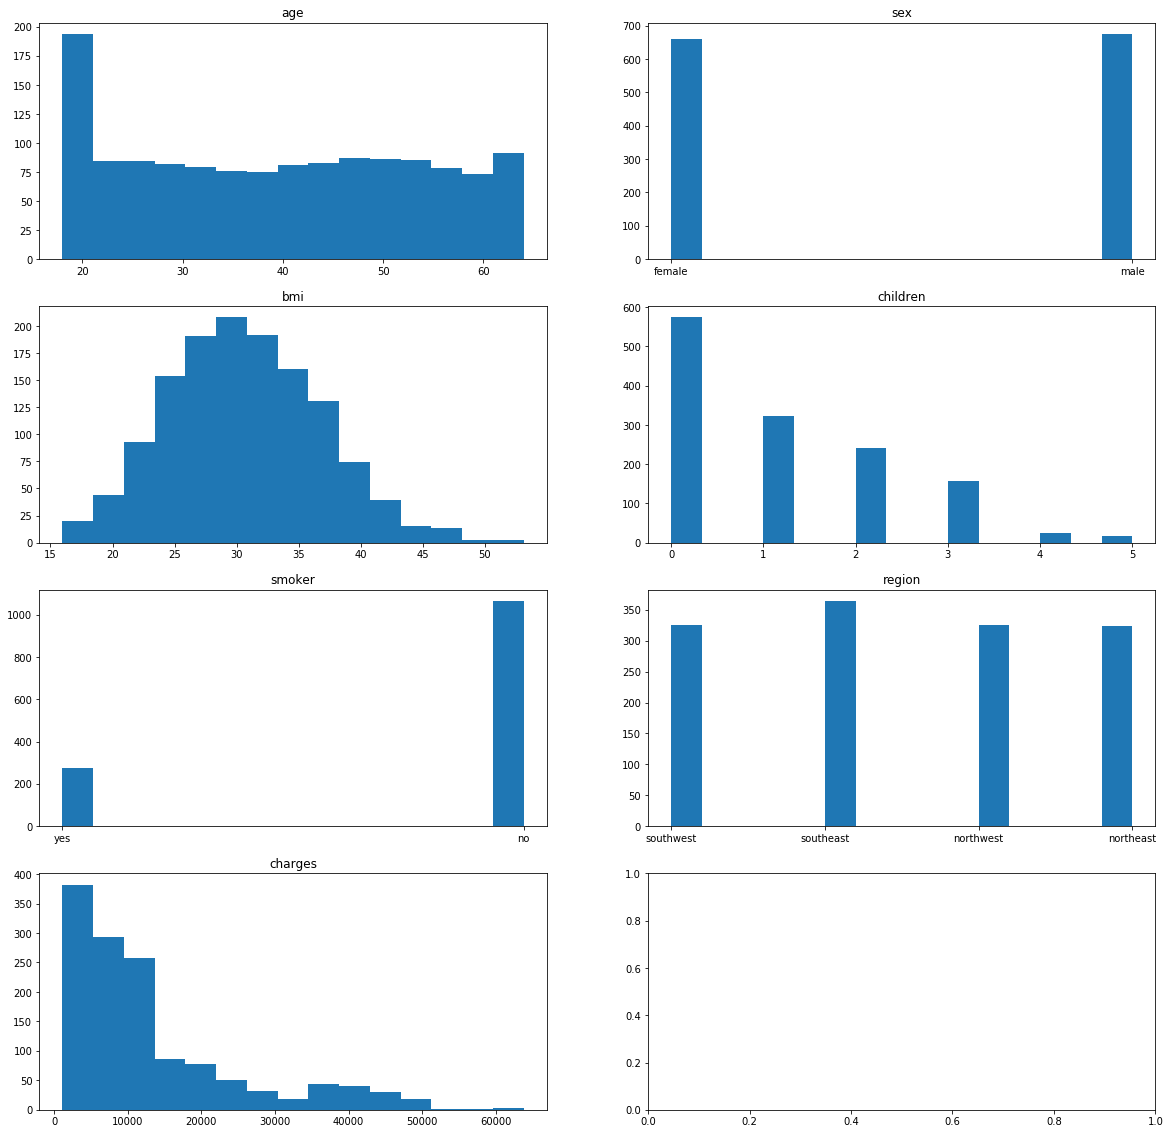

In [5]:
drawAllHist(dane, 2, 15) # wizualizacja pierwotnych danych

In [6]:
dane.info() # są kolumny które trzeba enkodować

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dane.isna().all().all #nie ma pustych danych

<bound method Series.all of age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool>

### Enkodowanie

In [8]:
dane['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [10]:
ohenc = OneHotEncoder()
labenc = LabelEncoder()

dane_enc = dane.drop(columns = ['region', 'sex', 'smoker' ])
region_enc = pd.DataFrame(ohenc.fit_transform(dane[['region']]).toarray(), columns = ['northeast','northwest','southeast','southwest'])
sex_enc = pd.DataFrame(labenc.fit_transform(dane[['sex']]), columns = ['is_male'])
smoker_enc = pd.DataFrame(labenc.fit_transform(dane[['smoker']]), columns = ['is_smoker'])

dane_enc = dane_enc.join(region_enc, how='outer')
dane_enc = dane_enc.join(sex_enc, how='outer')
dane_enc = dane_enc.join(smoker_enc, how='outer')
dane_enc

C:\Users\pmoni\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,age,bmi,children,charges,northeast,northwest,southeast,southwest,is_male,is_smoker
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0,1
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1,0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1,0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1,0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,1,0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,0,0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,0,0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,0,0


### Dodanie nowych zmiennych

In [11]:
# a = pd.DataFrame(dane_enc['age'] * dane_enc['age'])
# a
# nowa_kolumna8 = pd.DataFrame(dane_enc['age'] * dane_enc['age']) 
# nowa_kolumna8
# nowa_kolumna15 = pd.DataFrame(np.log(dane_enc['age']))
# nowa_kolumna15
# d = pd.DataFrame(dane_enc['bmi'] * dane_enc['bmi'], columns = ['AgeAge'])
# d

In [12]:
# do regresji (przy drzewach trzeba sprawdzić czy warto tworzyć nowe zmienne)
# nowa_kolumna1 = pd.DataFrame(dane_enc['age'] * dane_enc['bmi'], columns = ['AgeBmi']) 
# nowa_kolumna2 = pd.DataFrame(dane_enc['children'] * dane_enc['bmi'], columns = ['ChildrenBmi'])
# nowa_kolumna3 = pd.DataFrame(dane_enc['age'] * dane_enc['children'] * dane_enc['bmi'], columns = ['AgeChildrenBmi'])
# nowa_kolumna4 = pd.DataFrame(dane_enc['age'] * dane_enc['children'], columns = ['AgeChildren'])
# nowa_kolumna5 = pd.DataFrame(dane_enc['age'] * dane_enc['is_male'], columns = ['AgeIsMale'])
# nowa_kolumna6 = pd.DataFrame(dane_enc['bmi'] * dane_enc['is_male'], columns = ['BmiIsMale'])
# nowa_kolumna7 = pd.DataFrame(dane_enc['children'] * dane_enc['is_male'], columns = ['ChildrenIsMale'])

# Sqrt
# nowa_kolumna8 = pd.DataFrame(dane_enc['age'] * dane_enc['age'], columns = ['AgeSqrt']) 
# nowa_kolumna9 = pd.DataFrame(dane_enc['bmi'] * dane_enc['bmi'], columns = ['BmiSqrt'])
# nowa_kolumna10 = pd.DataFrame(dane_enc['children'] * dane_enc['children'], columns = ['childrenSqrt'])

#Log
# nowa_kolumna15 = pd.DataFrame(np.log(dane_enc['age']), columns = ['AgeLog']) 
# nowa_kolumna16 = pd.DataFrame(np.log(dane_enc['bmi']), columns = ['BmiLog'])

# dane_enc = dane_enc.join(nowa_kolumna1, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna2, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna3, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna4, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna5, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna6, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna7, how='outer')

# dane_enc = dane_enc.join(nowa_kolumna8, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna9, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna10, how='outer')

# dane_enc = dane_enc.join(nowa_kolumna15, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna16, how='outer') 

# dane_enc

In [13]:
dane_enc.isna().all()

age          False
bmi          False
children     False
charges      False
northeast    False
northwest    False
southeast    False
southwest    False
is_male      False
is_smoker    False
dtype: bool

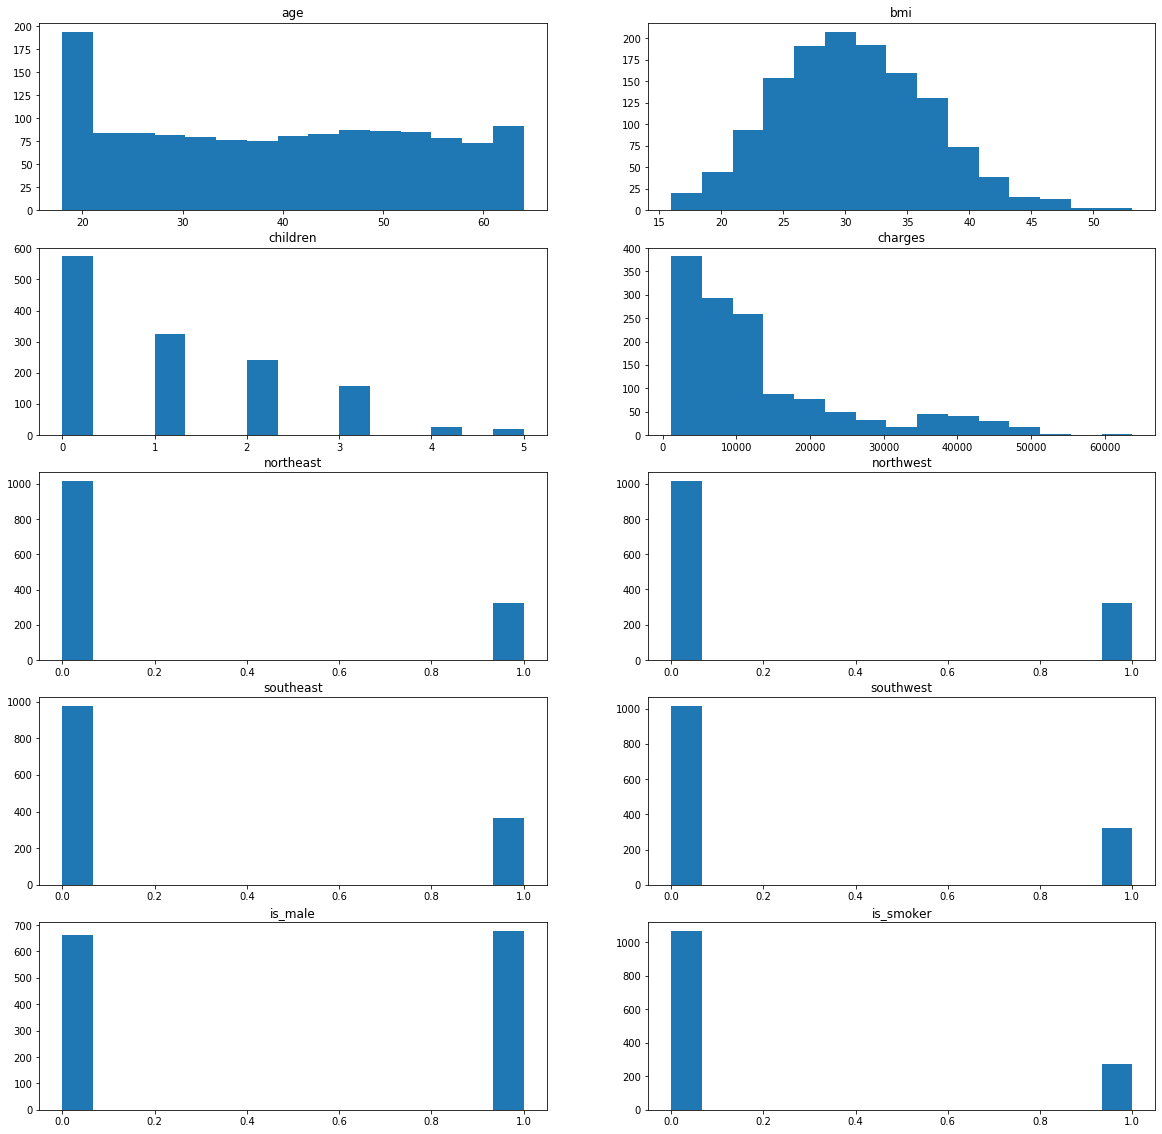

In [14]:
drawAllHist(dane_enc, 2, 15) # wykresy na danych enkodowanych

#### Usunięcie outlajerów

In [15]:
def outlier_iqr(df, colums):
    lower_limit = {}
    upper_limit = {}

    for col in colums:
        q1 = np.quantile(df[col], q=.25)
        q3 = np.quantile(df[col], q=.75)

        iqr = q3 - q1

        lower_limit[col] = q1 - 1.5 * iqr
        upper_limit[col] = q3 + 1.5 * iqr
        
    for col in colums:
        df = df.loc[(df[col] >= lower_limit[col]) & (df[col] <= upper_limit[col])]
    
    return df

In [16]:
dane_enc.columns

Index(['age', 'bmi', 'children', 'charges', 'northeast', 'northwest',
       'southeast', 'southwest', 'is_male', 'is_smoker'],
      dtype='object')

In [17]:
dane_enc = outlier_iqr(dane_enc, ['age', 'bmi', 'charges'])
#                                   , 'AgeBmi',
#        'ChildrenBmi', 'AgeChildrenBmi', 'AgeChildren', 'AgeIsMale',
#        'BmiIsMale'])
print(dane_enc.shape)
print(dane_enc.isna().all())

(1193, 10)
age          False
bmi          False
children     False
charges      False
northeast    False
northwest    False
southeast    False
southwest    False
is_male      False
is_smoker    False
dtype: bool


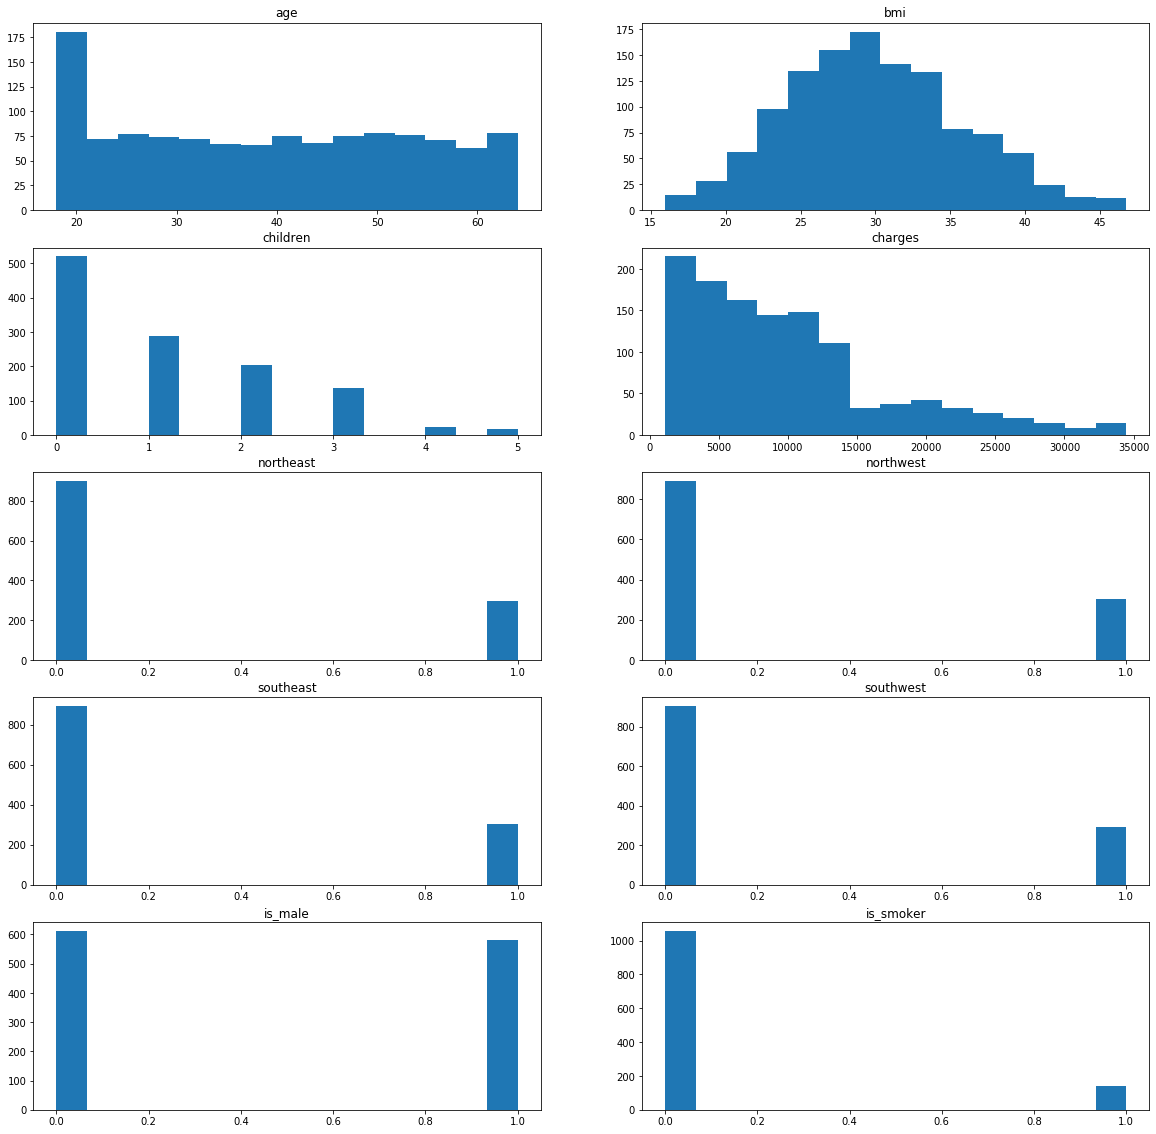

In [18]:
drawAllHist(dane_enc, 2, 15) # wykresy po ucięcu outlajerów

### Podział na zbiór treningowy / testowy i walidacyjny & Standaryzacja i Normalizacja

In [19]:
from sklearn.model_selection import train_test_split

X = dane_enc.drop(columns = ['charges'])
y = dane_enc['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size= .2)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_train, y_train, random_state = 12, test_size= .2) 

### Standaryzacja i Normalizacja (dannych treningowych, walidacyjnych i testowych)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

STDscaler = StandardScaler()
NRMscaler = MinMaxScaler()

# zmienne treningowe
X_train_v_std = STDscaler.fit_transform(X_train_v)
X_train_v_std_nrm = NRMscaler.fit_transform(X_train_v_std)

# zmienne walidacyjne
X_test_v_std = STDscaler.fit_transform(X_test_v)
X_test_v_std_nrm = NRMscaler.fit_transform(X_test_v_std)
X_test_std = STDscaler.fit_transform(X_test)
X_test_std_nrm = NRMscaler.fit_transform(X_test)


### Budowa modelu

### Klasteryzacja

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

%matplotlib inline
import seaborn as sns

In [22]:
for i in range(1,10):
    pca = PCA(n_components=i)
    dane_pca = pca.fit(X_train_v).transform(X_train_v)
    print(f'zmiennych: {i}')
    print(f'wspolczynnik wyjasnionych wariancji ({i} pierwszych skladowych): %s' %str
    (pca.explained_variance_ratio_))
    print(f'suma wyjasnionych wariancji ({i} pierwszych skladowych): %s' %str
    (sum(pca.explained_variance_ratio_)))
# optymalnie 3 klastry

zmiennych: 1
wspolczynnik wyjasnionych wariancji (1 pierwszych skladowych): [0.84997843]
suma wyjasnionych wariancji (1 pierwszych skladowych): 0.8499784263461015
zmiennych: 2
wspolczynnik wyjasnionych wariancji (2 pierwszych skladowych): [0.84997843 0.13951292]
suma wyjasnionych wariancji (2 pierwszych skladowych): 0.9894913427941878
zmiennych: 3
wspolczynnik wyjasnionych wariancji (3 pierwszych skladowych): [0.84997843 0.13951292 0.00608371]
suma wyjasnionych wariancji (3 pierwszych skladowych): 0.9955750494774669
zmiennych: 4
wspolczynnik wyjasnionych wariancji (4 pierwszych skladowych): [0.84997843 0.13951292 0.00608371 0.00107435]
suma wyjasnionych wariancji (4 pierwszych skladowych): 0.9966493965907223
zmiennych: 5
wspolczynnik wyjasnionych wariancji (5 pierwszych skladowych): [0.84997843 0.13951292 0.00608371 0.00107435 0.00104077]
suma wyjasnionych wariancji (5 pierwszych skladowych): 0.9976901648885074
zmiennych: 6
wspolczynnik wyjasnionych wariancji (6 pierwszych skladowych):

In [23]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 9,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

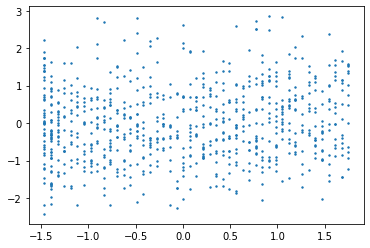

In [24]:
zmienne_all = scale(X_train_v.values)
plt.scatter(zmienne_all[:, 0], zmienne_all[:, 1], 2)

In [25]:
# zmienne = list(['age', 'bmi', 'children', 'charges', 'northeast', 'northwest', 'southeast', 'southwest', 'is_male', 'is_smoker'
#                ])

# for i in range(0,11):
#     for j in range(i+1,10):
#         plt.figure(figsize=(5,2))
#         ax = sns.scatterplot(x=zmienne[i],y=zmienne[j],data=dane_enc)
#         ax.set_title(f'{zmienne[i]} vs {zmienne[j]}')
    


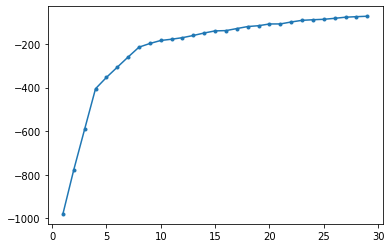

In [26]:
dane_enc_norm = scale(dane_enc.drop(columns = 'charges'))

scores = [KMeans(k).fit(X_train_v_std_nrm).score(X_train_v_std_nrm) for k in range(1, 30)]
plt.plot(range(1, 30), scores, markersize=3, marker="o")
plt.show() 
# 4 - 8 wymiarów / analiza na pełnych danych wskazuje na 5 wymiarów

In [27]:
ckm1 = KMeans(1).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm2 = KMeans(2).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm3 = KMeans(3).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm4 = KMeans(4).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm5 = KMeans(5).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm6 = KMeans(6).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm7 = KMeans(7).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm8 = KMeans(8).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm9 = KMeans(9).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)
ckm10 = KMeans(10).fit(X_train_v_std_nrm)#.predict(dane_enc_norm)

In [28]:
print ("Inertia for K-mean with 1 clusters =", ckm1.inertia_)
print ("Inertia for K-mean with 2 clusters =", ckm2.inertia_)
print ("Inertia for K-mean with 3 clusters =", ckm3.inertia_)
print ("Inertia for K-mean with 4 clusters =", ckm4.inertia_)
print ("Inertia for K-mean with 5 clusters =", ckm5.inertia_)
print ("Inertia for K-mean with 6 clusters =", ckm6.inertia_)
print ("Inertia for K-mean with 7 clusters =", ckm7.inertia_)
print ("Inertia for K-mean with 8 clusters =", ckm8.inertia_)
print ("Inertia for K-mean with 9 clusters =", ckm9.inertia_)
print ("Inertia for K-mean with 10 clusters =", ckm10.inertia_)
# 8 klastrów / po 4 pierwszy raz znacznie zmniejsza się uzysk, po 8 drugi raz krzywa wyraźnie zmienia nachylenie

Inertia for K-mean with 1 clusters = 980.0690135800419
Inertia for K-mean with 2 clusters = 786.9738251013977
Inertia for K-mean with 3 clusters = 590.9076952658761
Inertia for K-mean with 4 clusters = 405.5339575036915
Inertia for K-mean with 5 clusters = 353.70916443681165
Inertia for K-mean with 6 clusters = 306.6890768219001
Inertia for K-mean with 7 clusters = 259.89666622603966
Inertia for K-mean with 8 clusters = 214.65404655872607
Inertia for K-mean with 9 clusters = 197.85780083047274
Inertia for K-mean with 10 clusters = 184.0537051673442


In [29]:
pca = PCA(n_components=3)
x_pca=pca.fit_transform(X_train_v)
print(pca.explained_variance_ratio_)

[0.84997843 0.13951292 0.00608371]


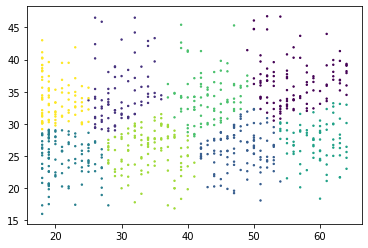

In [30]:
ckm_pca = KMeans(8).fit(x_pca).predict(x_pca)
plt.scatter(X_train_v.iloc[:,0], X_train_v.iloc[:,1], 2, c=ckm_pca)